# 네브라스카주 링컨시 데이터

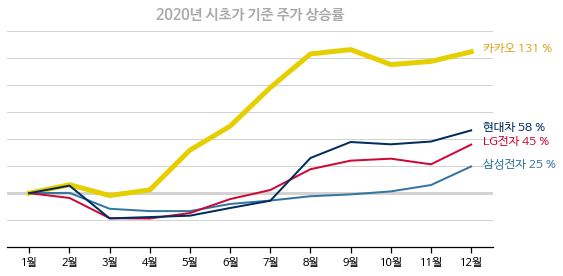

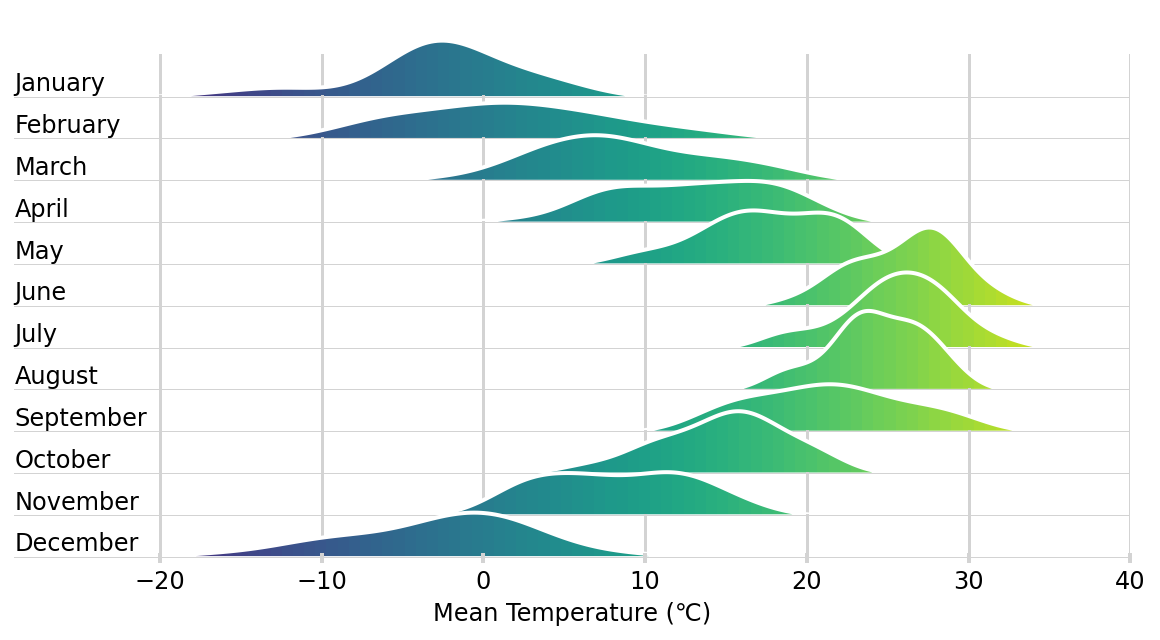

In [ ]:
# 코렙 한글폰트 적용
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
https://raw.githubusercontent.com/amcquistan/WeatherPredictPythonML/master/end-part2_df.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 네브라스카주 링컨시 데이터 다운: https://github.com/amcquistan/WeatherPredictPythonML
df_weather = pd.read_csv("https://raw.githubusercontent.com/amcquistan/WeatherPredictPythonML/master/end-part2_df.csv", index_col="date")


In [ ]:
df_weather.head()

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,meanpressurem_2,meanpressurem_3,maxhumidity_1,maxhumidity_2,maxhumidity_3,minhumidity_1,minhumidity_2,minhumidity_3,maxtempm_1,maxtempm_2,maxtempm_3,mintempm_1,mintempm_2,mintempm_3,maxdewptm_1,maxdewptm_2,maxdewptm_3,mindewptm_1,mindewptm_2,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-04,-14,-12,-18,-4.0,-6.0,-6.0,-11.0,-9.0,-12.0,1016.0,1022.0,1023.0,92.0,92.0,84.0,59.0,56.0,54.0,3.0,1.0,2.0,-13.0,-12.0,-13.0,-4.0,-6.0,-6.0,-16.0,-13.0,-18.0,1025.0,1026.0,1025.0,1010.0,1017.0,1019.0,0.76,0.00,0.00
2015-01-05,-9,-3,-14,-14.0,-4.0,-6.0,-19.0,-11.0,-9.0,1033.0,1016.0,1022.0,80.0,92.0,92.0,46.0,59.0,56.0,-12.0,3.0,1.0,-18.0,-13.0,-12.0,-16.0,-4.0,-6.0,-23.0,-16.0,-13.0,1043.0,1025.0,1026.0,1023.0,1010.0,1017.0,0.25,0.76,0.00
2015-01-06,-10,-6,-14,-9.0,-14.0,-4.0,-14.0,-19.0,-11.0,1032.0,1033.0,1016.0,80.0,80.0,92.0,53.0,46.0,59.0,-3.0,-12.0,3.0,-14.0,-18.0,-13.0,-8.0,-16.0,-4.0,-17.0,-23.0,-16.0,1043.0,1043.0,1025.0,1023.0,1023.0,1010.0,0.00,0.25,0.76
2015-01-07,-16,-12,-19,-10.0,-9.0,-14.0,-15.0,-14.0,-19.0,1036.0,1032.0,1033.0,80.0,80.0,80.0,54.0,53.0,46.0,-6.0,-3.0,-12.0,-14.0,-14.0,-18.0,-12.0,-8.0,-16.0,-18.0,-17.0,-23.0,1043.0,1043.0,1043.0,1027.0,1023.0,1023.0,0.00,0.00,0.25
2015-01-08,-7,2,-16,-16.0,-10.0,-9.0,-22.0,-15.0,-14.0,1035.0,1036.0,1032.0,72.0,80.0,80.0,45.0,54.0,53.0,-12.0,-6.0,-3.0,-19.0,-14.0,-14.0,-18.0,-12.0,-8.0,-24.0,-18.0,-17.0,1055.0,1043.0,1043.0,956.0,1027.0,1023.0,0.00,0.00,0.00


In [ ]:
# 2016년 데이터만 선택
df_2016 = df_weather.filter(like="2016", axis=0)

In [ ]:
df_2016.head()

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,meanpressurem_2,meanpressurem_3,maxhumidity_1,maxhumidity_2,maxhumidity_3,minhumidity_1,minhumidity_2,minhumidity_3,maxtempm_1,maxtempm_2,maxtempm_3,mintempm_1,mintempm_2,mintempm_3,maxdewptm_1,maxdewptm_2,maxdewptm_3,mindewptm_1,mindewptm_2,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,-2,3,-7,-8.0,-3.0,-4.0,-11.0,-7.0,-8.0,1030.0,1026.0,1021.0,91.0,88.0,88.0,53.0,63.0,63.0,-2.0,-1.0,-1.0,-14.0,-6.0,-7.0,-7.0,-6.0,-7.0,-16.0,-10.0,-11.0,1032.0,1029.0,1025.0,1027.0,1023.0,1015.0,0.0,0.76,0.00
2016-01-02,-3,4,-10,-2.0,-8.0,-3.0,-8.0,-11.0,-7.0,1029.0,1030.0,1026.0,81.0,91.0,88.0,48.0,53.0,63.0,3.0,-2.0,-1.0,-7.0,-14.0,-6.0,-6.0,-7.0,-6.0,-11.0,-16.0,-10.0,1032.0,1032.0,1029.0,1027.0,1027.0,1023.0,0.0,0.00,0.76
2016-01-03,-4,1,-9,-3.0,-2.0,-8.0,-8.0,-8.0,-11.0,1025.0,1029.0,1030.0,84.0,81.0,91.0,48.0,48.0,53.0,4.0,3.0,-2.0,-10.0,-7.0,-14.0,-5.0,-6.0,-7.0,-12.0,-11.0,-16.0,1027.0,1032.0,1032.0,1023.0,1027.0,1027.0,0.0,0.00,0.00
2016-01-04,-5,-2,-8,-4.0,-3.0,-2.0,-8.0,-8.0,-8.0,1030.0,1025.0,1029.0,92.0,84.0,81.0,63.0,48.0,48.0,1.0,4.0,3.0,-9.0,-10.0,-7.0,-6.0,-5.0,-6.0,-11.0,-12.0,-11.0,1034.0,1027.0,1032.0,1025.0,1023.0,1027.0,0.0,0.00,0.00
2016-01-05,-1,5,-6,-5.0,-4.0,-3.0,-8.0,-8.0,-8.0,1032.0,1030.0,1025.0,92.0,92.0,84.0,75.0,63.0,48.0,-2.0,1.0,4.0,-8.0,-9.0,-10.0,-6.0,-6.0,-5.0,-9.0,-11.0,-12.0,1035.0,1034.0,1027.0,1028.0,1025.0,1023.0,0.0,0.00,0.00


In [ ]:
# 날짜에서 월 추출
df_2016.reset_index(inplace=True)

In [ ]:
df_2016.head()

,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,meanpressurem_2,meanpressurem_3,maxhumidity_1,maxhumidity_2,maxhumidity_3,minhumidity_1,minhumidity_2,minhumidity_3,maxtempm_1,maxtempm_2,maxtempm_3,mintempm_1,mintempm_2,mintempm_3,maxdewptm_1,maxdewptm_2,maxdewptm_3,mindewptm_1,mindewptm_2,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
0,2016-01-01,-2,3,-7,-8.0,-3.0,-4.0,-11.0,-7.0,-8.0,1030.0,1026.0,1021.0,91.0,88.0,88.0,53.0,63.0,63.0,-2.0,-1.0,-1.0,-14.0,-6.0,-7.0,-7.0,-6.0,-7.0,-16.0,-10.0,-11.0,1032.0,1029.0,1025.0,1027.0,1023.0,1015.0,0.0,0.76,0.00
1,2016-01-02,-3,4,-10,-2.0,-8.0,-3.0,-8.0,-11.0,-7.0,1029.0,1030.0,1026.0,81.0,91.0,88.0,48.0,53.0,63.0,3.0,-2.0,-1.0,-7.0,-14.0,-6.0,-6.0,-7.0,-6.0,-11.0,-16.0,-10.0,1032.0,1032.0,1029.0,1027.0,1027.0,1023.0,0.0,0.00,0.76
2,2016-01-03,-4,1,-9,-3.0,-2.0,-8.0,-8.0,-8.0,-11.0,1025.0,1029.0,1030.0,84.0,81.0,91.0,48.0,48.0,53.0,4.0,3.0,-2.0,-10.0,-7.0,-14.0,-5.0,-6.0,-7.0,-12.0,-11.0,-16.0,1027.0,1032.0,1032.0,1023.0,1027.0,1027.0,0.0,0.00,0.00
3,2016-01-04,-5,-2,-8,-4.0,-3.0,-2.0,-8.0,-8.0,-8.0,1030.0,1025.0,1029.0,92.0,84.0,81.0,63.0,48.0,48.0,1.0,4.0,3.0,-9.0,-10.0,-7.0,-6.0,-5.0,-6.0,-11.0,-12.0,-11.0,1034.0,1027.0,1032.0,1025.0,1023.0,1027.0,0.0,0.00,0.00
4,2016-01-05,-1,5,-6,-5.0,-4.0,-3.0,-8.0,-8.0,-8.0,1032.0,1030.0,1025.0,92.0,92.0,84.0,75.0,63.0,48.0,-2.0,1.0,4.0,-8.0,-9.0,-10.0,-6.0,-6.0,-5.0,-9.0,-11.0,-12.0,1035.0,1034.0,1027.0,1028.0,1025.0,1023.0,0.0,0.00,0.00


In [ ]:
df_2016["month"] = df_2016["date"].apply(lambda s: int(s.split("-")[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_2016.head()

,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,meanpressurem_2,meanpressurem_3,maxhumidity_1,maxhumidity_2,maxhumidity_3,minhumidity_1,minhumidity_2,minhumidity_3,maxtempm_1,maxtempm_2,maxtempm_3,mintempm_1,mintempm_2,mintempm_3,maxdewptm_1,maxdewptm_2,maxdewptm_3,mindewptm_1,mindewptm_2,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3,month
0,2016-01-01,-2,3,-7,-8.0,-3.0,-4.0,-11.0,-7.0,-8.0,1030.0,1026.0,1021.0,91.0,88.0,88.0,53.0,63.0,63.0,-2.0,-1.0,-1.0,-14.0,-6.0,-7.0,-7.0,-6.0,-7.0,-16.0,-10.0,-11.0,1032.0,1029.0,1025.0,1027.0,1023.0,1015.0,0.0,0.76,0.00,1
1,2016-01-02,-3,4,-10,-2.0,-8.0,-3.0,-8.0,-11.0,-7.0,1029.0,1030.0,1026.0,81.0,91.0,88.0,48.0,53.0,63.0,3.0,-2.0,-1.0,-7.0,-14.0,-6.0,-6.0,-7.0,-6.0,-11.0,-16.0,-10.0,1032.0,1032.0,1029.0,1027.0,1027.0,1023.0,0.0,0.00,0.76,1
2,2016-01-03,-4,1,-9,-3.0,-2.0,-8.0,-8.0,-8.0,-11.0,1025.0,1029.0,1030.0,84.0,81.0,91.0,48.0,48.0,53.0,4.0,3.0,-2.0,-10.0,-7.0,-14.0,-5.0,-6.0,-7.0,-12.0,-11.0,-16.0,1027.0,1032.0,1032.0,1023.0,1027.0,1027.0,0.0,0.00,0.00,1
3,2016-01-04,-5,-2,-8,-4.0,-3.0,-2.0,-8.0,-8.0,-8.0,1030.0,1025.0,1029.0,92.0,84.0,81.0,63.0,48.0,48.0,1.0,4.0,3.0,-9.0,-10.0,-7.0,-6.0,-5.0,-6.0,-11.0,-12.0,-11.0,1034.0,1027.0,1032.0,1025.0,1023.0,1027.0,0.0,0.00,0.00,1
4,2016-01-05,-1,5,-6,-5.0,-4.0,-3.0,-8.0,-8.0,-8.0,1032.0,1030.0,1025.0,92.0,92.0,84.0,75.0,63.0,48.0,-2.0,1.0,4.0,-8.0,-9.0,-10.0,-6.0,-6.0,-5.0,-9.0,-11.0,-12.0,1035.0,1034.0,1027.0,1028.0,1025.0,1023.0,0.0,0.00,0.00,1


## 시각화

In [ ]:
for i, ax in enumerate(axs, 1):
    print(ax)

AxesSubplot(0.125,0.826831;0.775x0.053169)
AxesSubplot(0.125,0.763028;0.775x0.053169)
AxesSubplot(0.125,0.699225;0.775x0.053169)
AxesSubplot(0.125,0.635423;0.775x0.053169)
AxesSubplot(0.125,0.57162;0.775x0.053169)
AxesSubplot(0.125,0.507817;0.775x0.053169)
AxesSubplot(0.125,0.444014;0.775x0.053169)
AxesSubplot(0.125,0.380211;0.775x0.053169)
AxesSubplot(0.125,0.316408;0.775x0.053169)
AxesSubplot(0.125,0.252606;0.775x0.053169)
AxesSubplot(0.125,0.188803;0.775x0.053169)
AxesSubplot(0.125,0.125;0.775x0.053169)


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


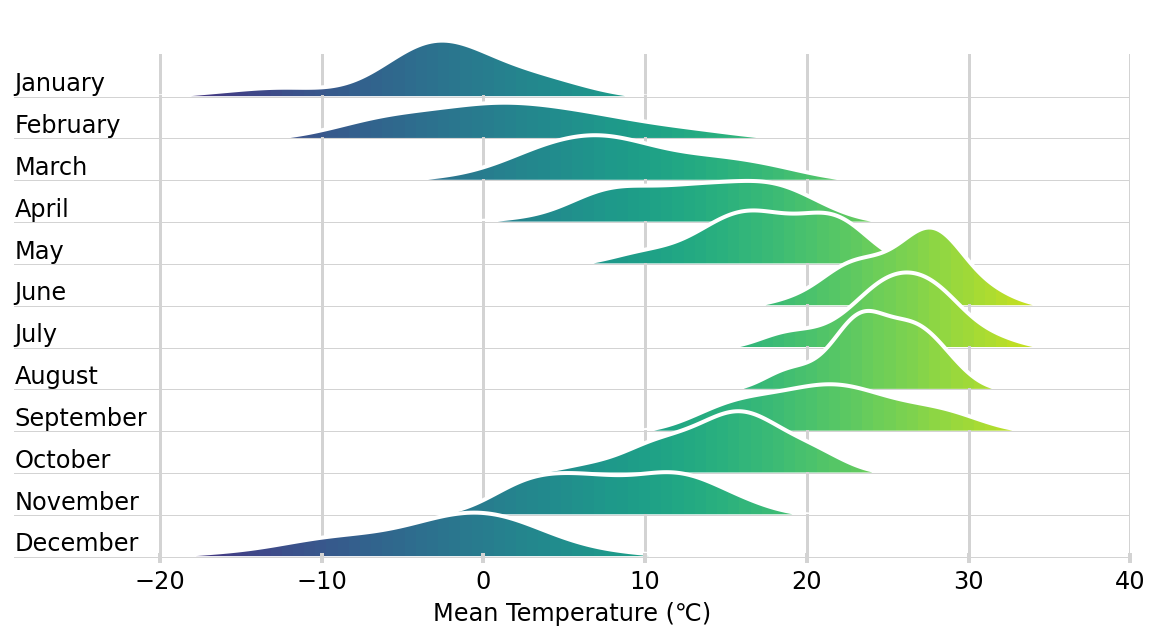

In [ ]:
import calendar 
#import cmocean as cmo

fig, axs = plt.subplots(nrows=12, figsize=(10,5), sharex=True, sharey=True)
fig.set_facecolor("none")

x = np.linspace(0, 1, 100)
for i, ax in enumerate(axs, 1):
    sns.kdeplot(df_2016.query(f"month=={i}")["meantempm"], 
                fill=True, color="w", alpha=0, linewidth=2, legend=False, ax=ax)
    
    ax.set_xlim(-29, 40)    
    
    # >>> 밀도함수에 gradient 추가
    im = ax.imshow(np.vstack([x, x]), 
               #cmap="cmo.thermal",
               aspect="auto",
               extent=[*ax.get_xlim(), *ax.get_ylim()]
              )
    path = ax.collections[0].get_paths()[0]
    patch = mpl.patches.PathPatch(path, transform=ax.transData)
    im.set_clip_path(patch)
    # <<< 밀도함수에 gradient 추가
    
    ax.text(-29, 0.01, calendar.month_name[i], fontdict={"fontsize":"large"}) 
    
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    if i != 12:
        ax.tick_params(axis="x", length=0)
    else:
        ax.tick_params(axis="x", direction="inout", color="lightgray", 
                       length=5, width=2, labelsize="large")
        ax.set_xlabel("Mean Temperature (℃)", fontdict={"fontsize":"large"})
    
    ax.set_yticks([]) 
    ax.set_ylabel("") 
    
    xticks = ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick, xtick], [0, 0.065], color='lightgray', zorder=0)
        
    ax.axhline(0, color="lightgray")
    ax.set_facecolor("none")
    
fig.subplots_adjust(hspace=-0.5)

In [ ]:
df_jan = df_2016.query("month==1")
df_jan.head()

,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,meanpressurem_2,meanpressurem_3,maxhumidity_1,maxhumidity_2,maxhumidity_3,minhumidity_1,minhumidity_2,minhumidity_3,maxtempm_1,maxtempm_2,maxtempm_3,mintempm_1,mintempm_2,mintempm_3,maxdewptm_1,maxdewptm_2,maxdewptm_3,mindewptm_1,mindewptm_2,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3,month
0,2016-01-01,-2,3,-7,-8.0,-3.0,-4.0,-11.0,-7.0,-8.0,1030.0,1026.0,1021.0,91.0,88.0,88.0,53.0,63.0,63.0,-2.0,-1.0,-1.0,-14.0,-6.0,-7.0,-7.0,-6.0,-7.0,-16.0,-10.0,-11.0,1032.0,1029.0,1025.0,1027.0,1023.0,1015.0,0.0,0.76,0.00,1
1,2016-01-02,-3,4,-10,-2.0,-8.0,-3.0,-8.0,-11.0,-7.0,1029.0,1030.0,1026.0,81.0,91.0,88.0,48.0,53.0,63.0,3.0,-2.0,-1.0,-7.0,-14.0,-6.0,-6.0,-7.0,-6.0,-11.0,-16.0,-10.0,1032.0,1032.0,1029.0,1027.0,1027.0,1023.0,0.0,0.00,0.76,1
2,2016-01-03,-4,1,-9,-3.0,-2.0,-8.0,-8.0,-8.0,-11.0,1025.0,1029.0,1030.0,84.0,81.0,91.0,48.0,48.0,53.0,4.0,3.0,-2.0,-10.0,-7.0,-14.0,-5.0,-6.0,-7.0,-12.0,-11.0,-16.0,1027.0,1032.0,1032.0,1023.0,1027.0,1027.0,0.0,0.00,0.00,1
3,2016-01-04,-5,-2,-8,-4.0,-3.0,-2.0,-8.0,-8.0,-8.0,1030.0,1025.0,1029.0,92.0,84.0,81.0,63.0,48.0,48.0,1.0,4.0,3.0,-9.0,-10.0,-7.0,-6.0,-5.0,-6.0,-11.0,-12.0,-11.0,1034.0,1027.0,1032.0,1025.0,1023.0,1027.0,0.0,0.00,0.00,1
4,2016-01-05,-1,5,-6,-5.0,-4.0,-3.0,-8.0,-8.0,-8.0,1032.0,1030.0,1025.0,92.0,92.0,84.0,75.0,63.0,48.0,-2.0,1.0,4.0,-8.0,-9.0,-10.0,-6.0,-6.0,-5.0,-9.0,-11.0,-12.0,1035.0,1034.0,1027.0,1028.0,1025.0,1023.0,0.0,0.00,0.00,1


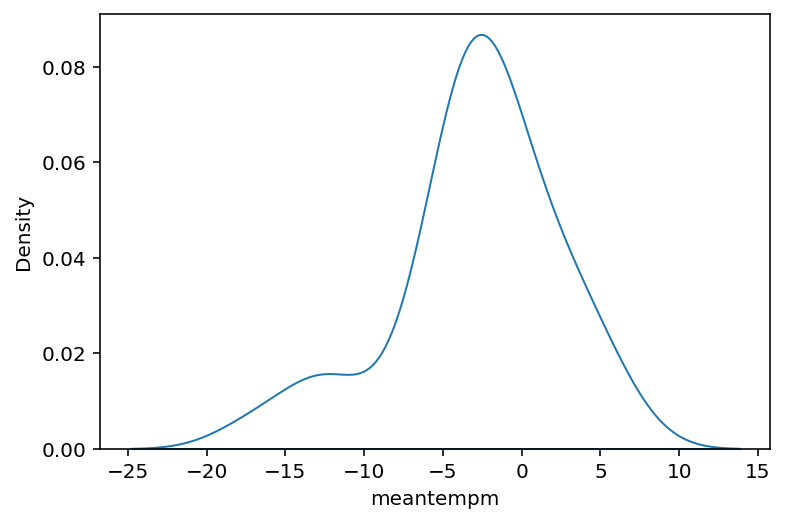

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df_jan["meantempm"], fill=True, alpha=0, ax=ax)

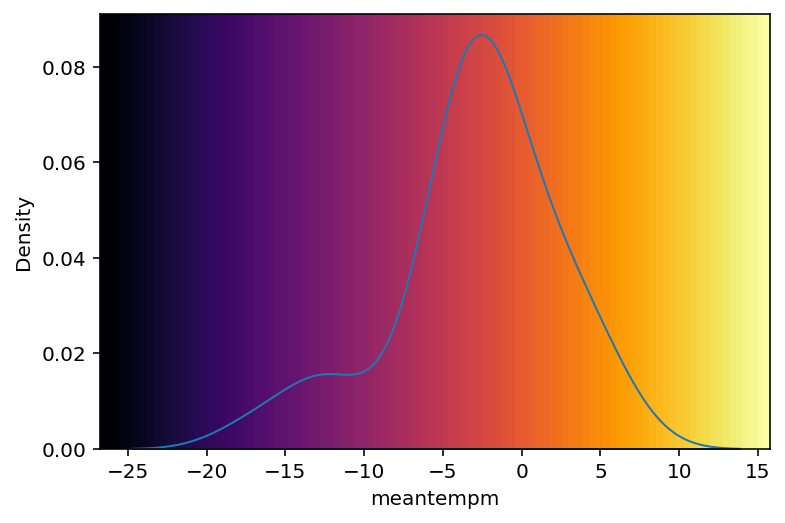

In [ ]:
x = np.linspace(0, 1, 100)

im = ax.imshow(np.vstack([x, x]), 
               cmap="inferno",
               aspect="auto",
               extent=[*ax.get_xlim(), *ax.get_ylim()]
              )
              
display(fig)

In [ ]:
print(ax.collections[0].get_paths()[0])

Path(array([[-2.48238595e+01,  5.51614084e-05],
       [-2.48238595e+01,  0.00000000e+00],
       [-2.46296499e+01,  0.00000000e+00],
       [-2.44354402e+01,  0.00000000e+00],
       [-2.42412306e+01,  0.00000000e+00],
       [-2.40470209e+01,  0.00000000e+00],
       [-2.38528113e+01,  0.00000000e+00],
       [-2.36586017e+01,  0.00000000e+00],
       [-2.34643920e+01,  0.00000000e+00],
       [-2.32701824e+01,  0.00000000e+00],
       [-2.30759727e+01,  0.00000000e+00],
       [-2.28817631e+01,  0.00000000e+00],
       [-2.26875534e+01,  0.00000000e+00],
       [-2.24933438e+01,  0.00000000e+00],
       [-2.22991342e+01,  0.00000000e+00],
       [-2.21049245e+01,  0.00000000e+00],
       [-2.19107149e+01,  0.00000000e+00],
       [-2.17165052e+01,  0.00000000e+00],
       [-2.15222956e+01,  0.00000000e+00],
       [-2.13280859e+01,  0.00000000e+00],
       [-2.11338763e+01,  0.00000000e+00],
       [-2.09396666e+01,  0.00000000e+00],
       [-2.07454570e+01,  0.00000000e+00],
      

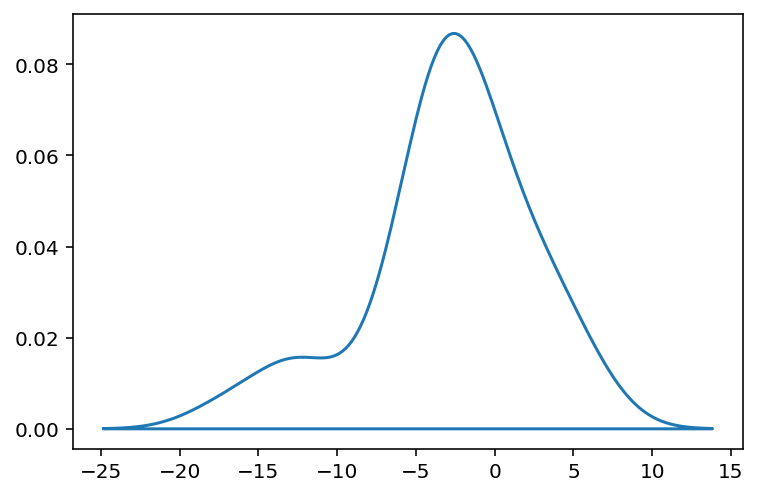

In [ ]:
vertices = ax.collections[0].get_paths()[0].vertices.T

plt.plot(*vertices)

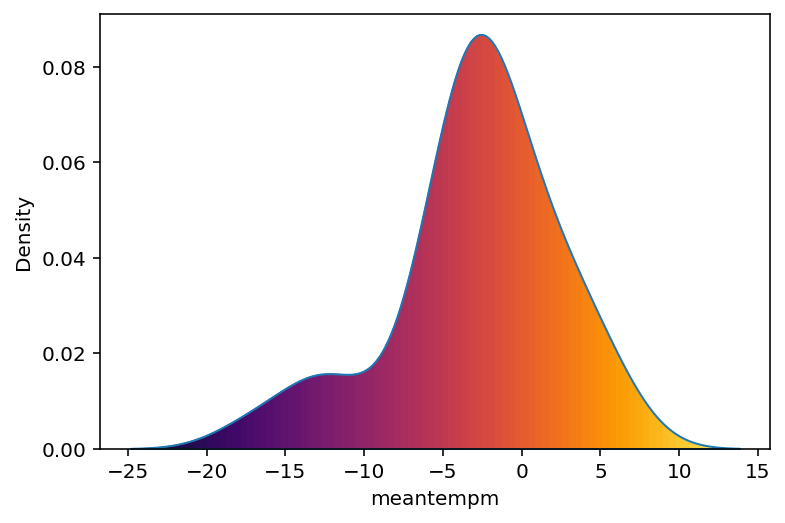

In [ ]:
path = ax.collections[0].get_paths()[0]
patch = mpl.patches.PathPatch(path, transform=ax.transData)
im.set_clip_path(patch)

display(fig)

# 주가 데이터

In [20]:
# 1. matplotlib version updgrade (v3.2.2 to v3.4.1)
# !pip install matplotlib -U
import matplotlib as mpl
mpl.__version__

'3.2.2'

In [ ]:
# 2. 한글 폰트 설치
# https://velog.io/@jgpark1998/Colab-%ED%95%9C%EA%B8%80-%EA%B9%A8%EC%A7%90-RuntimeWarning-%EC%98%A4%EB%A5%98-%ED%95%B4%EA%B2%B0%ED%95%98%EA%B8%B0
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 사용
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# generate data: 월평균 주가

# 월
m2020 = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']

# 삼성전자 월평균 주가
sec = [58842, 58988, 50357, 49086, 49086, 52968, 54828, 57170, 58176, 59787, 63255, 73343]

# 카카오 월평균 주가
kakao = [32640, 35182, 31920, 33615, 45613, 52834, 64459, 74602, 75905, 71392, 72355, 75260]

# LG전자 월평균 주가
lge = [68860, 65820, 52949, 52748, 56216, 65089, 70857, 84090, 89524, 90789, 87202, 99738]

# 현대자동차 월평균 주가
hdm = [119700, 128012,  91800,  93258,  94808, 103291, 111326, 158588, 176226, 173697, 176762, 189095]

# 입력됐는지 확인
print("# 2020년 1월 ~ 12월")
print("-            월:", m2020)
print("- 삼성전자 주가:", sec)

# 2020년 1월 ~ 12월
-            월: ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']
- 삼성전자 주가: [58842, 58988, 50357, 49086, 49086, 52968, 54828, 57170, 58176, 59787, 63255, 73343]


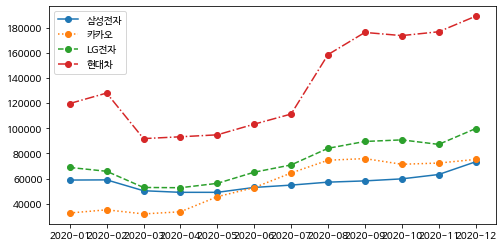

In [ ]:
# 1. 상태기반(state-based)

plt.figure(figsize=(8, 4))
plt.plot(m2020, sec, "o-", label="삼성전자")
plt.plot(m2020, kakao, "o:", label="카카오")
plt.plot(m2020, lge, "o--", label="LG전자")
plt.plot(m2020, hdm, "o-.", label="현대차")
plt.legend()

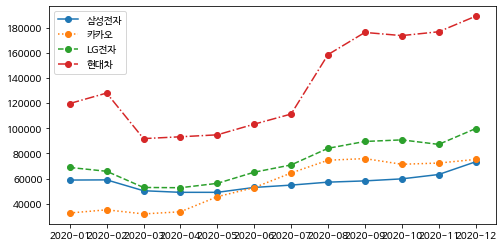

In [ ]:
# 2. 객체지향(object-oriented)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec, "o-", label="삼성전자")
ax.plot(m2020, kakao, "o:", label="카카오")
ax.plot(m2020, lge, "o--", label="LG전자")
ax.plot(m2020, hdm, "o-.", label="현대차")
ax.legend()

In [ ]:
# 3. 수익률 비교
# - 월별 평균 주가 연초 시초가로 나눔

sec_rate = np.array(sec)/sec[0] - 1 
kakao_rate = np.array(kakao)/kakao[0] - 1
lge_rate = np.array(lge)/lge[0] - 1
hdm_rate = np.array(hdm)/hdm[0] - 1

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


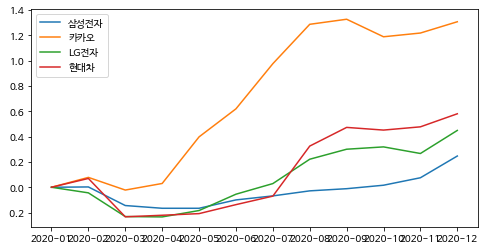

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec_rate, label="삼성전자")
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")
ax.legend()

(-0.5, 1.5)

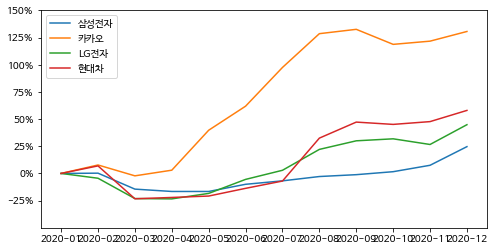

In [ ]:
# 4. y축 눈금 정비, - 사라짐 문제 해결

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec_rate, label="삼성전자")
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")
ax.legend()

yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

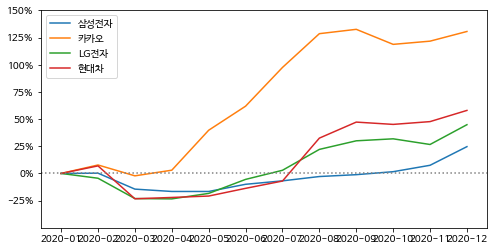

In [ ]:
# 5. 손익이 잘 드러나게 변경

ax.axhline(y=0, c="gray", ls=":")
display(fig)

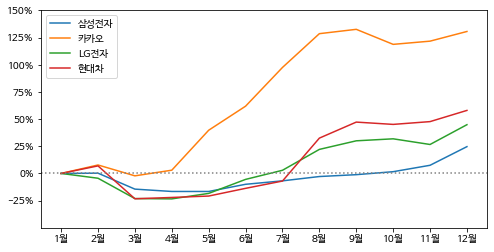

In [ ]:
# 6. 가로축을 깔끔하게 변경

xticklabels = [f"{i}월" for i in range(1, 13)]
ax.set_xticks(range(0, 12))
ax.set_xticklabels(xticklabels)
display(fig)

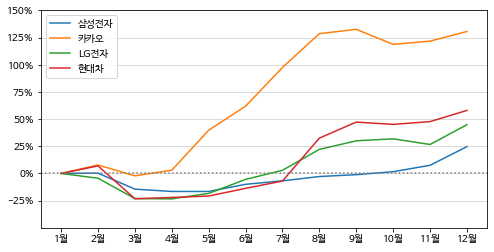

In [ ]:
# 7. y축 grid 추가

ax.grid(axis="y", c="lightgray")
display(fig)

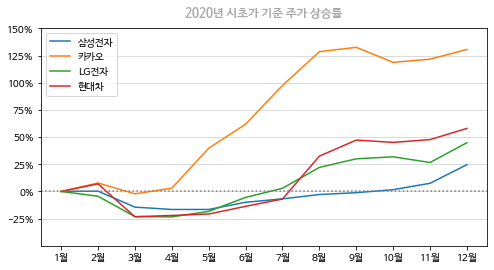

In [ ]:
# 8. title 추가

ax.set_title("2020년 시초가 기준 주가 상승률", 
             fontweight="bold", fontsize="large", color="darkgray", pad=12)
display(fig)

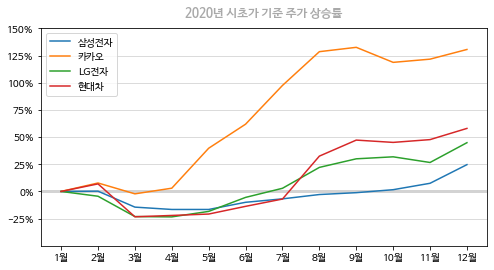

In [ ]:
# 전체 코드 정리

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, sec_rate, label="삼성전자")  # line plot
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")

xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점 *

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

In [ ]:
# 기업 색상 (RGB)

sec_c = np.array([52, 117, 162])/255   # np.array([12, 77, 162])/255
kakao_c = np.array([230, 207, 1])/255  # np.array([250, 227, 1])/255
lge_c = np.array([203, 10, 55])/255
hdm_c = np.array([1, 44, 95])/255

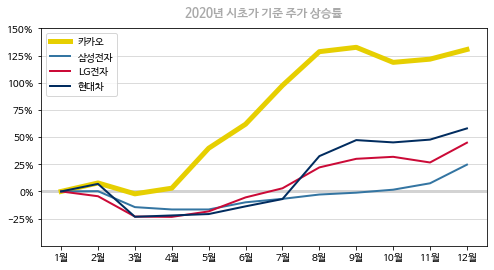

In [ ]:
# 카카오 강조

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot *
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

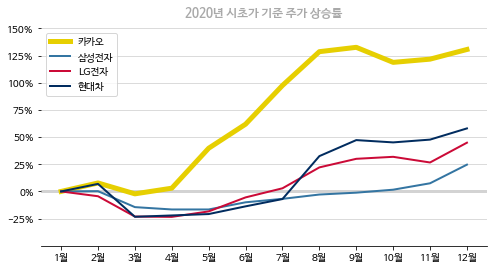

In [22]:
# 불필요한 테두리 지우기

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

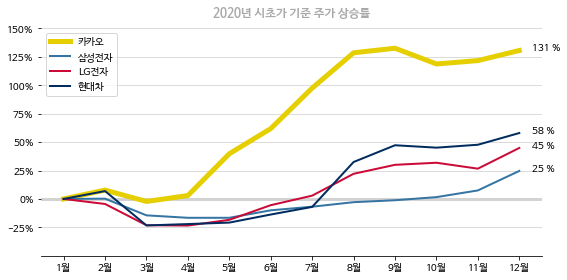

In [23]:
# 상승률 숫자 달기

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 상승률 *
for r in [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]:
    ax.text(11.3, r, f"{r*100:.0f} %")


xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

fig.tight_layout()

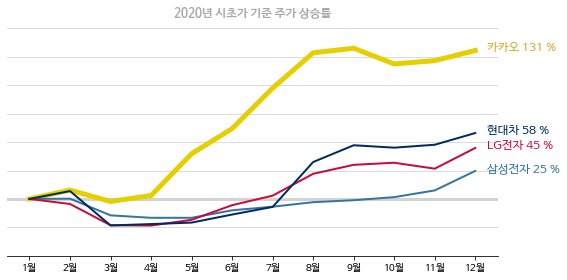

In [24]:
# legend 떼고 회사 색상 입히기, y축 눈금 제거하기

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 회사 이름 + 상승률 * 
rates = [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]
companies = ["카카오", "삼성전자", "LG전자", "현대차"]
colors = ["goldenrod", sec_c, lge_c, hdm_c]
for r, co, c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r*100:.0f} %", color=c, fontsize=12)


xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.set_ylim(-0.5, )
ax.tick_params(axis="y", length=0) # y축 눈금 지우기

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

# ax.legend()
fig.tight_layout()

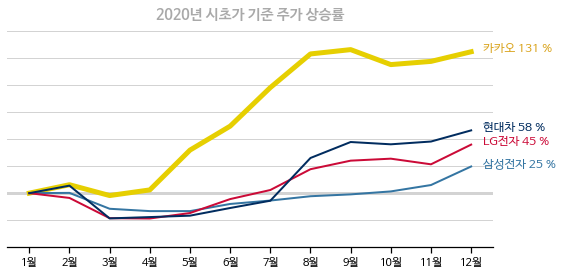

In [25]:
# context 설정
sns.set_context("notebook")

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 상승률
rates = [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]
companies = ["카카오", "삼성전자", "LG전자", "현대차"]
colors = ["goldenrod", sec_c, lge_c, hdm_c]
for r, co, c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r*100:.0f} %", color=c, fontsize=12)


xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.set_ylim(-0.5, )
ax.tick_params(axis="y", length=0) # y축 눈금 지우기

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)


ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

# ax.legend()
fig.tight_layout()

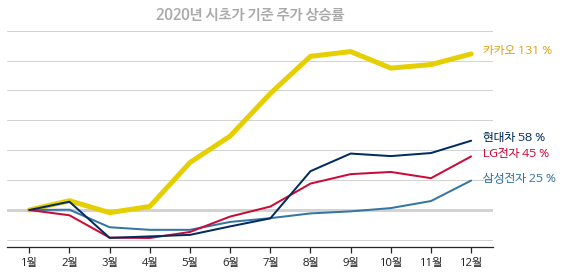

In [26]:
# style 설정
sns.set_style("ticks")
plt.rc('font', family='NanumBarunGothic') 

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 상승률
rates = [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]
companies = ["카카오", "삼성전자", "LG전자", "현대차"]
colors = ["goldenrod", sec_c, lge_c, hdm_c]
for r, co, c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r*100:.0f} %", color=c, fontsize=12)


xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.tick_params(axis="y", length=0)

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

# ax.legend()
fig.tight_layout()

In [27]:
### Appendix. 주가 데이터 가져오기

import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [28]:
# https://jjeongil.tistory.com/656

# file_name 다운로드한 주가 데이터를 저장할 파일 이름
# company_code 종목 코드
# year1/month1/date1 데이터를 다운로드할 시작일
# year2/month2/date2 데이터를 다운로드할 마감일
def download_stock_data(file_name, company_code, year1, month1, date1, year2, month2, date2):
    start = datetime.datetime(year1, month1, date1)
    end = datetime.datetime(year2, month2, date2)
    df = web.DataReader("%s.KS" % (company_code), "yahoo", start, end)
    df.to_pickle(file_name)
    return df


def load_stock_data(file_name):
    df = pd.read_pickle(file_name)
    return df


download_stock_data('sec.data', '005930', 2016, 1, 1, 2020, 12, 31)
df_sec = load_stock_data('sec.data')

download_stock_data('lge.data', '066570', 2016, 1, 1, 2020, 12, 31)
df_lge = load_stock_data('lge.data')

download_stock_data('kakao.data', '035720', 2016, 1, 1, 2020, 12, 31)
df_kakao = load_stock_data('kakao.data')

download_stock_data('hdm.data', '005380', 2016, 1, 1, 2020, 12, 31)
df_hdm = load_stock_data('hdm.data')

In [29]:
df_kakao

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,23500.0,23060.0,23500.0,23060.0,1488435.0,22928.773438
2016-01-05,23500.0,22760.0,22820.0,23420.0,1590180.0,23286.726562
2016-01-06,24220.0,23460.0,23600.0,23820.0,2720685.0,23684.451172
2016-01-07,24100.0,23320.0,23680.0,23460.0,1710970.0,23326.500000
2016-01-08,23180.0,22740.0,23060.0,23040.0,2000230.0,22908.888672
...,...,...,...,...,...,...
2020-12-23,77100.0,75400.0,76200.0,75500.0,3149760.0,75469.640625
2020-12-24,76000.0,74400.0,75700.0,74800.0,2325660.0,74769.921875
2020-12-28,75400.0,73900.0,74900.0,74600.0,3232320.0,74570.000000


In [30]:
# open 시가
# high 고가
# low 저가
# close 종가
# volume 거래량
# Adj Close 주식의 분할, 배당, 배분 등을 고려해 조정한 종가

def calc_mavg(df):
    df = df.reset_index()
    df["y_m"] = df["Date"].dt.to_period("M")
    df["avg"] = df[["Open", "Close"]].mean(axis=1)
    return np.round(df.groupby("y_m").mean()["avg"].values, 0).astype(int)

sec_2020 = calc_mavg(df_sec)
kakao_2020 = calc_mavg(df_kakao)
lge_2020 = calc_mavg(df_lge)
hdm_2020 = calc_mavg(df_hdm)
sec_2020

array([23140, 23312, 25087, 25680, 25552, 28055, 29883, 31866, 31607,
       32045, 32445, 35461, 37413, 38574, 41028, 41934, 45571, 46518,
       49364, 46977, 50118, 53979, 55518, 50762, 50021, 47331, 49648,
       50091, 51255, 48449, 46270, 45856, 46071, 43607, 43379, 39820,
       41508, 46340, 44551, 46075, 43074, 44764, 46246, 43856, 47192,
       49907, 52232, 53501, 58842, 58988, 50357, 49086, 49086, 52968,
       54828, 57170, 58176, 59787, 63255, 73343])